In [2]:
# in anaconda3 terminal:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
import csv
import statistics as s
import matplotlib.pyplot as plt

In [11]:
tmp = []
with open('data.csv') as csvfile:
    csv_data = csv.reader(csvfile, delimiter=';')
    for row in csv_data:
        tmp.append(row)

In [12]:
data = []
for row in tmp:
    if row != [] and row[0]!='bits_len':
        results = [int(i) for i in row[-1].split(',')]
        mean = s.mean(results)
        median = s.median(results)
        variance = s.variance(results, mean)
        std_deviation = s.stdev(results)
        row[-1] = results
        row.append([mean, median, variance, std_deviation])
        data.append(row)
# print(data)

In [37]:
d = ['a'*7]
with open("data_updated1.csv", 'w+', newline='') as f:
    w = csv.writer(f, delimiter=',')
    w.writerow(["bits", "L", "BER", "N", "K","mean", "median", "variance", "std dev"])
    for row in data:
        new_row = []
        for el in row:
            if type(el)==list:
                if len(el)<6:
                    for i in el:
                        new_row.append(i)
                    # new_row.append(';')
            else:
                new_row.append(el)
                # new_row.append(';')
        w.writerow(new_row)


In [4]:
data = data[1:]
data_map = {}
for row in data:
    try:
        if data_map[row[0]]:
            pass
    except KeyError:
        data_map[row[0]] = {}

    try:
        if data_map[row[0]][row[1]]:
            pass
    except KeyError:
        data_map[row[0]][row[1]] = {}

    try:
        if data_map[row[0]][row[1]][row[2]]:
            pass
    except KeyError:
        data_map[row[0]][row[1]][row[2]] = {}

    try:
        if data_map[row[0]][row[1]][row[2]][row[3]]:
            pass
    except KeyError:
        data_map[row[0]][row[1]][row[2]][row[3]] = {}

    try:
        if data_map[row[0]][row[1]][row[2]][row[3]][row[4]]:
            pass
    except KeyError:
        data_map[row[0]][row[1]][row[2]][row[3]][row[4]] = {}
    try:
        if data_map[row[0]][row[1]][row[2]][row[3]][row[4]]['statistics']:
            pass
    except KeyError:
        data_map[row[0]][row[1]][row[2]][row[3]][row[4]]['statistics'] = {}
    try:
        if data_map[row[0]][row[1]][row[2]][row[3]][row[4]]['results']:
            pass
    except KeyError:
        data_map[row[0]][row[1]][row[2]][row[3]][row[4]]['results'] = {}
    data_map[row[0]][row[1]][row[2]][row[3]][row[4]]['results'] = row[5]
    data_map[row[0]][row[1]][row[2]][row[3]][row[4]]['statistics'] = row[6]


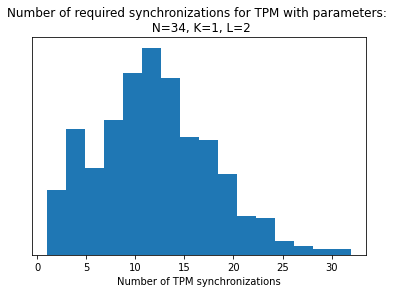

mean=11.864 
median=12.0 
std deviation=5.995113574699573 
variance=35.941386773547094


In [20]:
res = data_map['128']['2']['2']['43']['1']['results']
stat = data_map['128']['2']['2']['43']['1']['statistics']
plt.hist(x=res, bins='auto')
plt.title("Number of required synchronizations for TPM with parameters: \n N={}, K={}, L={}".format(34,1,2))
plt.xlabel("Number of TPM synchronizations")
plt.yticks([])
plt.show()
print("mean={} \nmedian={} \nstd deviation={} \nvariance={}".format(stat[0],stat[1],stat[3],stat[2]))


